In [54]:
#import all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


warnings.filterwarnings("ignore")

pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)
pd.set_option('display.float_format', lambda x: '%.3f' %x)

In [144]:
#Read Files
appl = pd.read_csv('./application_data.csv')
prev_appl = pd.read_csv('./previous_application.csv')

In [146]:
print(appl.shape[0])
print(prev_appl.shape[0])


307511
1670214


In [3]:
appl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [4]:
appl.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.500,24700.500,351000.000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.019,-9461,-637,-3648.000,-2120,nan,1,1,0,1,1,0,Laborers,1.000,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083,0.263,0.139,0.025,0.037,0.972,0.619,0.014,0.000,0.069,0.083,0.125,0.037,0.020,0.019,0.000,0.000,0.025,0.038,0.972,0.634,0.014,0.000,0.069,0.083,0.125,0.038,0.022,0.020,0.000,0.000,0.025,0.037,0.972,0.624,0.014,0.000,0.069,0.083,0.125,0.037,0.021,0.019,0.000,0.000,reg oper account,block of flats,0.015,"Stone, brick",No,2.000,2.000,2.000,2.000,-1134.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,1.000
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.500,35698.500,1129500.000,Family,State servant,Higher education,Married,House / apartment,0.004,-16765,-1188,-1186.000,-291,nan,1,1,0,1,1,0,Core staff,2.000,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311,0.622,nan,0.096,0.053,0.985,0.796,0.060,0.080,0.035,0.292,0.333,0.013,0.077,0.055,0.004,0.010,0.092,0.054,0.985,0.804,0.050,0.081,0.035,0.292,0.333,0.013,0.079,0.055,0.000,0.000,0.097,0.053,0.985,0.799,0.061,0.080,0.035,0.292,0.333,0.013,0.079,0.056,0.004,0.010,reg oper account,block of flats,0.071,Block,No,1.000,0.000,1.000,0.000,-828.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.000,6750.000,135000.000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010,-19046,-225,-4260.000,-2531,26.000,1,1,1,1,1,0,Laborers,1.000,2,2,MONDAY,9,0,0,0,0,0,0,Government,nan,0.556,0.730,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,

In [6]:
#check the distribution of columns and percentage of available values
desc_aapl=appl.describe(include='all').transpose()
desc_aapl['percent_of_data']=desc_aapl['count']/307511 * 100
desc_aapl.reset_index(inplace=True)
desc_aapl[['index','count','percent_of_data']]

,index,count,percent_of_data
0,SK_ID_CURR,307511.000,100.000
1,TARGET,307511.000,100.000
2,NAME_CONTRACT_TYPE,307511,100.000
3,CODE_GENDER,307511,100.000
4,FLAG_OWN_CAR,307511,100.000
5,FLAG_OWN_REALTY,307511,100.000
6,CNT_CHILDREN,307511.000,100.000
7,AMT_INCOME_TOTAL,307511.000,100.000
8,AMT_CREDIT,307511.000,100.000
9,AMT_ANNUITY,307499.000,99.996


## Check Missing Values & possible columns for imputation

In [7]:
# checking missing data
total = appl.isnull().sum()
percent = (appl.isnull().sum()/appl.isnull().count()*100)
mis_val  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

#check the columns having high missing values
mis_val[mis_val.Percent>60].sort_values(by = 'Percent', ascending = False)

,Total,Percent
COMMONAREA_MEDI,214865,69.872
COMMONAREA_AVG,214865,69.872
COMMONAREA_MODE,214865,69.872
NONLIVINGAPARTMENTS_MEDI,213514,69.433
NONLIVINGAPARTMENTS_AVG,213514,69.433
NONLIVINGAPARTMENTS_MODE,213514,69.433
FONDKAPREMONT_MODE,210295,68.386
LIVINGAPARTMENTS_AVG,210199,68.355
LIVINGAPARTMENTS_MEDI,210199,68.355
LIVINGAPARTMENTS_MODE,210199,68.355


In [15]:
#check for how many records a customer owns a car but the car age is missing
print("Number of records where person's car age is missing : ", appl[appl['OWN_CAR_AGE'].isna()][['FLAG_OWN_CAR','OWN_CAR_AGE']].shape[0])
print("Number of records where car age is missing and the owner doesn't own a car ", appl[(appl['OWN_CAR_AGE'].isna()) & (appl['FLAG_OWN_CAR']=='N')][['FLAG_OWN_CAR','OWN_CAR_AGE']].shape[0])
print("Records where car age is missing but owner owns a car.")
appl[(appl['OWN_CAR_AGE'].isna()) & (appl['FLAG_OWN_CAR']=='Y')][['FLAG_OWN_CAR','OWN_CAR_AGE']]



Number of records where person's car age is missing :  202929
Number of records where car age is missing and the owner doesn't own a car  202924
Records where car age is missing but owner owns a car.


,FLAG_OWN_CAR,OWN_CAR_AGE
30897,Y,nan
181231,Y,nan
217549,Y,nan
229867,Y,nan
236868,Y,nan


- So, for a large  number of records where car age is missing and customer doesn't own a car,car age can be safely imputed to zero as the value is missing because of the unavailability of car.
- For CAR age there are 5 records for which the customer owns a car but its age is not mentioned so we can remove these rows, 

### So we can say that even when there are 60-70% missing values in the columns, we must check the columns once and not directly remove them from analysis.
### There may be some columns which contain large missing values, but can easily be imputed to a number based on other columns.
### Rest columns can be removed if there is no safe imputation available according to the business logic

In [12]:
# Checking the columns which has missing values between 10 and 60%
mis_val[(mis_val.Percent<60) & (mis_val.Percent>10)].sort_values(by = 'Percent', ascending = True)

,Total,Percent
AMT_REQ_CREDIT_BUREAU_YEAR,41519,13.502
AMT_REQ_CREDIT_BUREAU_MON,41519,13.502
AMT_REQ_CREDIT_BUREAU_WEEK,41519,13.502
AMT_REQ_CREDIT_BUREAU_DAY,41519,13.502
AMT_REQ_CREDIT_BUREAU_HOUR,41519,13.502
AMT_REQ_CREDIT_BUREAU_QRT,41519,13.502
EXT_SOURCE_3,60965,19.825
OCCUPATION_TYPE,96391,31.346
EMERGENCYSTATE_MODE,145755,47.398
TOTALAREA_MODE,148431,48.269


In [13]:
#checking for data in occupation type column to check if imputation is possible
round((appl.groupby(['OCCUPATION_TYPE']).TARGET.count()/len(appl.index))*100,2).sort_values(ascending=False)

OCCUPATION_TYPE
Laborers                17.950
Sales staff             10.440
Core staff               8.970
Managers                 6.950
Drivers                  6.050
High skill tech staff    3.700
Accountants              3.190
Medicine staff           2.780
Security staff           2.190
Cooking staff            1.930
Cleaning staff           1.510
Private service staff    0.860
Low-skill Laborers       0.680
Waiters/barmen staff     0.440
Secretaries              0.420
Realty agents            0.240
HR staff                 0.180
IT staff                 0.170
Name: TARGET, dtype: float64

## Here for categorical variables, we can use a method of imputation called the hot deck or cold deck imputation.
### It is a method in which we can observe two or more variables and compare their values with the values for the missing column and impute accordingly.
### eg. Here we need to check what to impute for the missing values in occupation column. So we will tke the median /mode of Annual income/credit for all the occupation types and the occupation which has the closed median/ mode to the missing value' s income/ credit will be imputed for that row.

### So, if the income/ credit of a record with missing occupation type is close to the median/mode of all the laborers, then we will impute laborer in the missing column.
### This would be much more accurate than just imputing all the rows by total median/ mode etc.

In [15]:
appl.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


## Check for incorrect values in columns if any

In [16]:
appl.groupby(['CODE_GENDER', 'TARGET']).TARGET.count().unstack()

TARGET,0,1
CODE_GENDER,,
F,188278.000,14170.000
M,94404.000,10655.000
XNA,4.000,nan


In [17]:
appl[appl['CODE_GENDER'] == 'XNA' ][['CODE_GENDER', 'NAME_FAMILY_STATUS','CNT_CHILDREN', 'CNT_FAM_MEMBERS']]

,CODE_GENDER,NAME_FAMILY_STATUS,CNT_CHILDREN,CNT_FAM_MEMBERS
35657,XNA,Married,0,2.000
38566,XNA,Married,2,4.000
83382,XNA,Married,1,3.000
189640,XNA,Civil marriage,0,2.000


**Column CODE_GENDER contains Male, Female, XNA where XNA seems to be incorrect value having only 4 entries so we can remove these 4 rows**

In [18]:
appl.groupby(['NAME_FAMILY_STATUS', 'TARGET']).TARGET.count().unstack()

TARGET,0,1
NAME_FAMILY_STATUS,,
Civil marriage,26814.000,2961.000
Married,181582.000,14850.000
Separated,18150.000,1620.000
Single / not married,40987.000,4457.000
Unknown,2.000,nan
Widow,15151.000,937.000


**Column NAME_FAMILY_STATUS contains 2 unknown values so we can remove these 2 rows**

In [147]:
appl[appl['NAME_FAMILY_STATUS']=='Unknown']

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
41982,148605,0,Revolving loans,M,N,Y,0,450000.000,675000.000,33750.000,nan,NaN,Commercial associate,Lower secondary,Unknown,Municipal apartment,0.015,-12396,-1161,-3265.000,-4489,nan,1,1,1,1,1,0,Managers,nan,2,2,THURSDAY,15,0,1,1,0,1,1,Insurance,0.629,0.701,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,nan,NaN,NaN,3.000,0.000,3.000,0.000,-876.000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,nan,nan,nan,nan,nan,nan
187348,317181,0,Revolving loans,F,N,Y,0,202500.000,585000.000,29250.000,nan,NaN,Commercial associate,Higher education,Unknown,House / apartment,0.031,-12844,-232,-1597.000,-1571,nan,1,1,0,1,0,0,Accountants,nan,2,2,FRIDAY,14,0,0,0,0,0,0,Business Entity Type 2,nan,0.645,0.671,0.103,0.047,0.997,0.959,0.008,0.080,0.069,0.375,0.417,nan,0.084,0.088,0.000,0.000,0.105,0.049,0.997,0.961,0.008,0.081,0.069,0.375,0.417,nan,0.092,0.092,0.000,0.000,0.104,0.047,0.997,0.960,0.008,0.080,0.069,0.375,0.417,nan,0.086,0.090,0.000,0.000,reg oper account,block of flats,0.079,Panel,No,1.000,0.000,1.000,0.000,-654.000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,1.000


# Outlier Detection

In [19]:
#Calculate IQR
Q1 = appl.quantile(0)
Q3 = appl.quantile(0.90)
IQR = Q3 - Q1


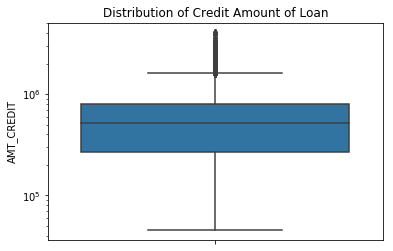

In [20]:
#Check outlier for Amount Credit Coloumn

sns.boxplot(appl['AMT_CREDIT'],orient='v')
plt.title('Distribution of Credit Amount of Loan')
plt.yscale('log')
plt.show()


In [39]:
print('Count of outlier for AMT_CREDIT: ',appl[appl['AMT_CREDIT']>(Q3['AMT_CREDIT']+1.5*IQR['AMT_CREDIT'])].shape[0])

Count of outlier for AMT_CREDIT:  43


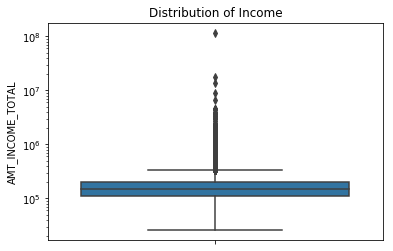

In [21]:
# see the distriution of income
sns.boxplot(y=appl.AMT_INCOME_TOTAL)
plt.title('Distribution of Income')
plt.yscale('log')
plt.show()

In [22]:
print('Count of outlier for AMT_INCOME_TOTAL: ',appl[appl['AMT_INCOME_TOTAL']>(Q3['AMT_INCOME_TOTAL']+1.5*IQR['AMT_INCOME_TOTAL'])].shape[0])

Count of outlier for AMT_INCOME_TOTAL:  1441


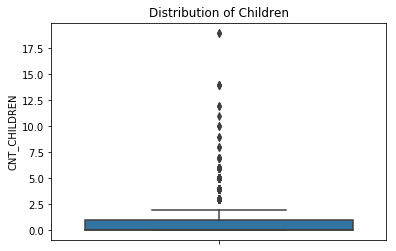

In [156]:
# see the distriution of children
sns.boxplot(y=appl.CNT_CHILDREN)
plt.title('Distribution of Children')
#plt.yscale('log')
plt.show()

In [24]:
appl.groupby(['CNT_CHILDREN']).CNT_CHILDREN.count()

CNT_CHILDREN
0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
8          2
9          2
10         2
11         1
12         2
14         3
19         2
Name: CNT_CHILDREN, dtype: int64

In [25]:
print('90th quantile for count of children is: ',Q3['CNT_CHILDREN'])
print('Count of outlier for CNT_CHILDREN: ',appl[appl['CNT_CHILDREN']>(Q3['CNT_CHILDREN']+1.5*IQR['CNT_CHILDREN'])].shape[0])

90th quantile for count of children is:  2.0
Count of outlier for CNT_CHILDREN:  42


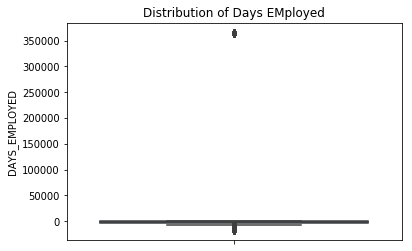

In [26]:
#Distribution of Days Employed
sns.boxplot(appl['DAYS_EMPLOYED'],orient='v')
plt.title('Distribution of Days EMployed')
plt.show()

In [27]:
print('3rd Quartile for Days Employed: ',Q3['DAYS_EMPLOYED'])
print('1st Quartile for Days Employed: ',Q1['DAYS_EMPLOYED'])

3rd Quartile for Days Employed:  365243.0
1st Quartile for Days Employed:  -17912.0


In [32]:
print("Outlier in days employed : ",appl[appl['DAYS_EMPLOYED']>(Q3['DAYS_EMPLOYED']+1.5*IQR['DAYS_EMPLOYED'])].shape[0])
print("Values greater than 0 for days employed : ",appl[appl['DAYS_EMPLOYED']>0]['DAYS_EMPLOYED'].shape[0])
print("Records where income type is pensioner and days of employed is greater than 0 : ",appl[(appl['NAME_INCOME_TYPE']=='Pensioner' )& (appl['DAYS_EMPLOYED']>0)]['DAYS_EMPLOYED'].shape[0])
print("Records where the income type is not pensioner but the days employed are greater than zero : \n",appl[(appl['NAME_INCOME_TYPE']!='Pensioner') & (appl['DAYS_EMPLOYED']>0)]['NAME_INCOME_TYPE'])
print(appl[(appl['NAME_INCOME_TYPE']=='Pensioner') & (appl['DAYS_EMPLOYED']<0)]['DAYS_EMPLOYED'].shape[0])


Outlier in days employed :  0
Values greater than 0 for days employed :  55374
Records where income type is pensioner and days of employed is greater than 0 :  55352
Records where the income type is not pensioner but the days employed are greater than zero : 
 1156      Unemployed
3937      Unemployed
23834     Unemployed
35352     Unemployed
37512     Unemployed
41723     Unemployed
77179     Unemployed
78336     Unemployed
80704     Unemployed
92061     Unemployed
114273    Unemployed
146286    Unemployed
158670    Unemployed
175433    Unemployed
204212    Unemployed
209722    Unemployed
209835    Unemployed
213274    Unemployed
216436    Unemployed
237750    Unemployed
268617    Unemployed
305365    Unemployed
Name: NAME_INCOME_TYPE, dtype: object
10


### Here, we observed that, mostly the days employedwere negative values, but there were around1/6th of the values positive and that too a very large number. 
### Then we checked it with the income type and found out that for most pensioners and unemployed people, the value was positive. 
### The values for unemployed seemed to be correct, but for pensioners the value came to around 1000 years which ma be a default value put. 
### So we need to change this value to some other value or in general can be substituted by 60 -20 = 40 years which is a normal year span for mployment.

In [61]:
appl['abs_days_emp']=appl['DAYS_EMPLOYED'].abs()

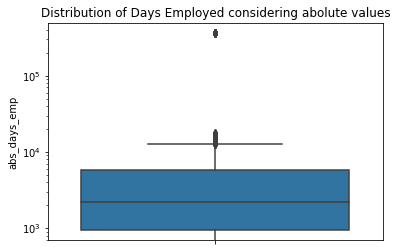

In [63]:
#Distribution of Days Employed
sns.boxplot(appl['abs_days_emp'],orient='v')
plt.title('Distribution of Days Employed considering abolute values')
plt.yscale('log')
plt.show()

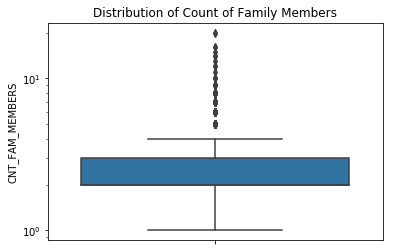

In [66]:
# see the distriution for Count of Family Members
sns.boxplot(y=appl.CNT_FAM_MEMBERS)
plt.title('Distribution of Count of Family Members')
plt.yscale('log')
plt.show()

In [67]:
appl.groupby(['CNT_FAM_MEMBERS']).CNT_FAM_MEMBERS.count()

CNT_FAM_MEMBERS
1.000      67847
2.000     158357
3.000      52601
4.000      24697
5.000       3478
6.000        408
7.000         81
8.000         20
9.000          6
10.000         3
11.000         1
12.000         2
13.000         1
14.000         2
15.000         1
16.000         2
20.000         2
Name: CNT_FAM_MEMBERS, dtype: int64

In [68]:
print('Count of outlier for CNT_FAM_MEMBERS: ',appl[appl['CNT_FAM_MEMBERS']>(Q3['CNT_FAM_MEMBERS']+1.5*IQR['CNT_FAM_MEMBERS'])].shape[0])

Count of outlier for CNT_FAM_MEMBERS:  121


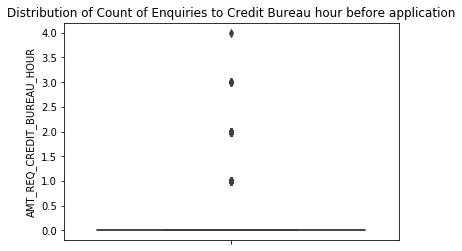

In [71]:
# see the distribution for Count of Enquiries to Credit Bureau
sns.boxplot(y=appl.AMT_REQ_CREDIT_BUREAU_HOUR)
plt.title('Distribution of Count of Enquiries to Credit Bureau hour before application')
plt.show()

In [72]:
print('Count of outlier for AMT_REQ_CREDIT_BUREAU_HOUR: ',appl[appl['AMT_REQ_CREDIT_BUREAU_HOUR']>(Q3['AMT_REQ_CREDIT_BUREAU_HOUR']+1.5*IQR['AMT_REQ_CREDIT_BUREAU_HOUR'])].shape[0])

Count of outlier for AMT_REQ_CREDIT_BUREAU_HOUR:  1626


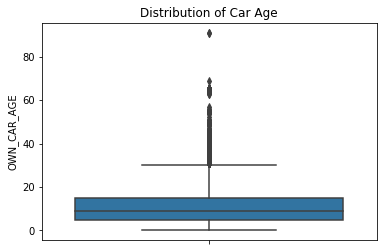

In [73]:
# see the distriution for Car's Age
sns.boxplot(y=appl.OWN_CAR_AGE)
plt.title('Distribution of Car Age')
plt.show()

In [74]:
print('Count of outlier for OWN_CAR_AGE: ',appl[appl['OWN_CAR_AGE']>(Q3['OWN_CAR_AGE']+1.5*IQR['OWN_CAR_AGE'])].shape[0])

Count of outlier for OWN_CAR_AGE:  3341


# Binning Contiuous Data into Bins

In [38]:
#Calculate Age from Days_BIRTH Column
appl['AGE']=appl['DAYS_BIRTH'].abs()/365
label=['20-30','30-40','40-50','50-60','60-70']
appl['age_group'] = pd.cut(appl['AGE'], bins=5,labels=label)
appl[['AGE','age_group']].head(10)

,AGE,age_group
0,25.921,20-30
1,45.932,40-50
2,52.181,50-60
3,52.068,50-60
4,54.608,50-60
5,46.414,40-50
6,37.748,30-40
7,51.644,50-60
8,55.066,50-60
9,39.641,30-40


## Age can be grouped according to the normal income scales. So we have binned together the age groups of 
### 20-30(newly employed having good future in payment of loans), 
### 30-40( usually higher earning section),
### 40-50( higher earning and near to pension/ leaving the job),
### 50-60( some already retired and some on verge of retirement),
### 60-70( mostly retired individuals who usually live on pensions)

### These bins are helpful in classification of data into different groups

In [ ]:
#Small family and large family binning in 
label=['Small','Large']
appl['fam_group'] = pd.cut(appl['CNT_FAM_MEMBERS'], bins=2,labels=label)
appl['fam_group'].unique()

    # AN to check unequal bins creation & add comment why we are binning

# Check Imbalance

In [89]:
print('Imbalance for 1:', ((appl[appl['TARGET']==1]['TARGET'].count())/(appl[appl['TARGET']==0]['TARGET'].count())*100))

Imbalance for 1: 8.781828601345662


# Correlation

In [170]:
# Find correlations with the target and sort
correlations = appl.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 DEF_60_CNT_SOCIAL_CIRCLE      0.031
DEF_30_CNT_SOCIAL_CIRCLE      0.032
LIVE_CITY_NOT_WORK_CITY       0.033
OWN_CAR_AGE                   0.038
DAYS_REGISTRATION             0.042
FLAG_DOCUMENT_3               0.044
REG_CITY_NOT_LIVE_CITY        0.044
FLAG_EMP_PHONE                0.046
REG_CITY_NOT_WORK_CITY        0.051
DAYS_ID_PUBLISH               0.051
DAYS_LAST_PHONE_CHANGE        0.055
REGION_RATING_CLIENT          0.059
REGION_RATING_CLIENT_W_CITY   0.061
DAYS_BIRTH                    0.078
TARGET                        1.000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                 -0.179
EXT_SOURCE_2                 -0.160
EXT_SOURCE_1                 -0.155
DAYS_EMPLOYED                -0.045
FLOORSMAX_AVG                -0.044
FLOORSMAX_MEDI               -0.044
FLOORSMAX_MODE               -0.043
AMT_GOODS_PRICE              -0.040
REGION_POPULATION_RELATIVE   -0.037
ELEVATORS_AVG                -0.034
ELEVATORS_ME

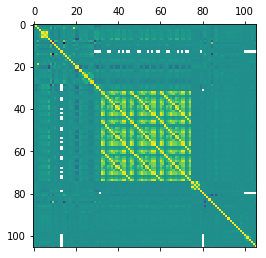

In [168]:

plt.matshow(appl['DAYS_BIRTH',].corr())
plt.show()

# Univariate Analysis

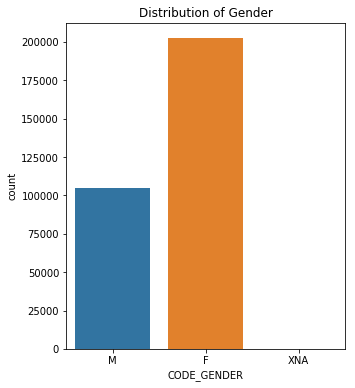

In [33]:
# Check the distribution of Gender
plt.figure(figsize=(5,6))
sns.countplot(x='CODE_GENDER', data =appl)
#plt.yscale('log')
plt.title('Distribution of Gender')
plt.show()

From above chart we can infere that the maximum number of applicants for loan are female

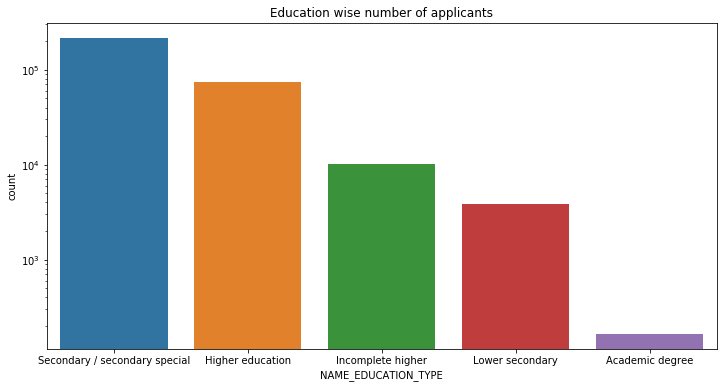

In [157]:
# Check the distribution of education type
plt.figure(figsize=(12,6))
sns.countplot(x='NAME_EDUCATION_TYPE', data =appl)
plt.yscale('log')
plt.title('Education wise number of applicants')
plt.show()

The maximum people applying for loan have the Secondary/secondary special as their Highest Qualification

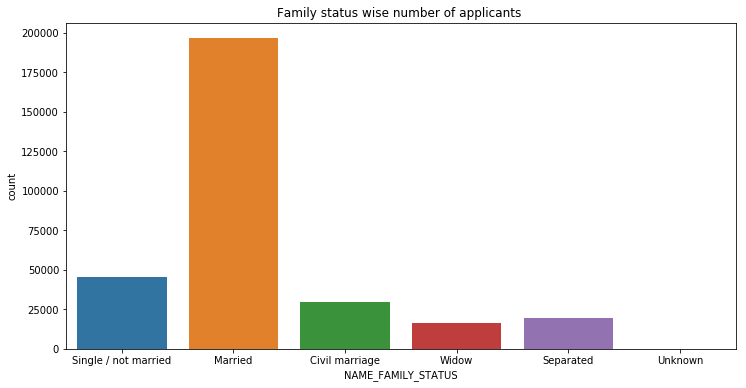

In [158]:
#Distribution of Family Status
plt.figure(figsize=(12,6))
sns.countplot(x='NAME_FAMILY_STATUS', data =appl)
plt.title('Family status wise number of applicants ')
#plt.yscale('log')
plt.show()

Maximum married people are applying for the loan

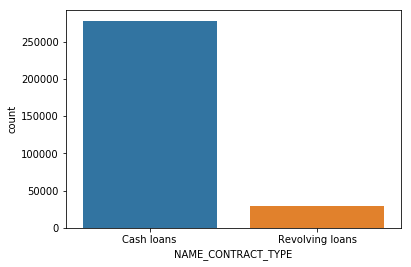

In [159]:
#Distribution of Contract Type
sns.countplot(x='NAME_CONTRACT_TYPE',data=appl)
#plt.yscale('log')
plt.show()

Most of the people are applying for Cash Loans

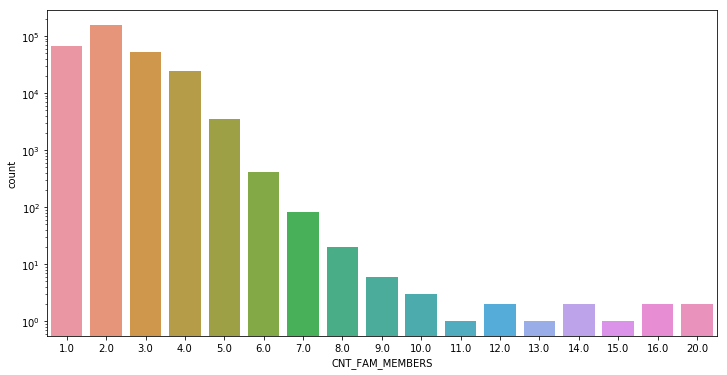

In [96]:
#check the distribution of Family Size
plt.figure(figsize=(12,6))
sns.countplot(x='CNT_FAM_MEMBERS', data =appl)
plt.yscale('log')
plt.show()

Text(0.5, 1.0, 'Ratio of defaulters to toal number of  application')

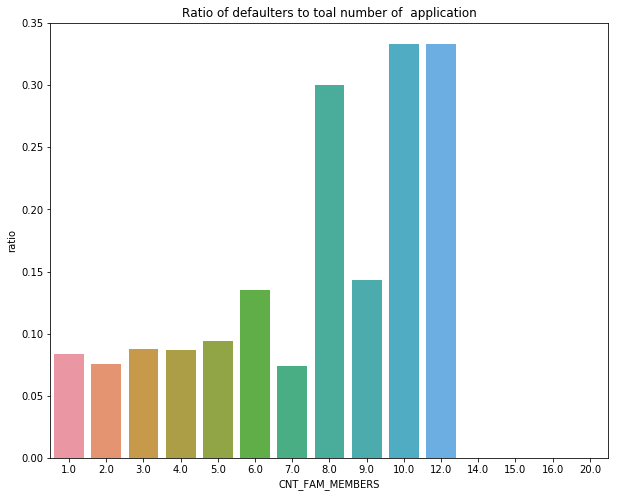

In [129]:
# Getting ration of defaulters to total applications
gb_0=df_0.groupby(['CNT_FAM_MEMBERS']).agg('count')
gb_0.reset_index(inplace=True)
gb_1=df_1.groupby(['CNT_FAM_MEMBERS']).agg('count')
gb_1.reset_index(inplace=True)
df_ratio=pd.DataFrame({"CNT_FAM_MEMBERS":gb_0['CNT_FAM_MEMBERS'],"ratio":gb_1['SK_ID_CURR']/(gb_0['SK_ID_CURR']+gb_1['SK_ID_CURR'])})
plt.figure(figsize=(10,8))
ax=sns.barplot(x='CNT_FAM_MEMBERS',y='ratio',data=df_ratio)

plt.title('Ratio of defaulters to toal number of  application')

# AN to check if we can plot above graph on bins for fam_group and add inference

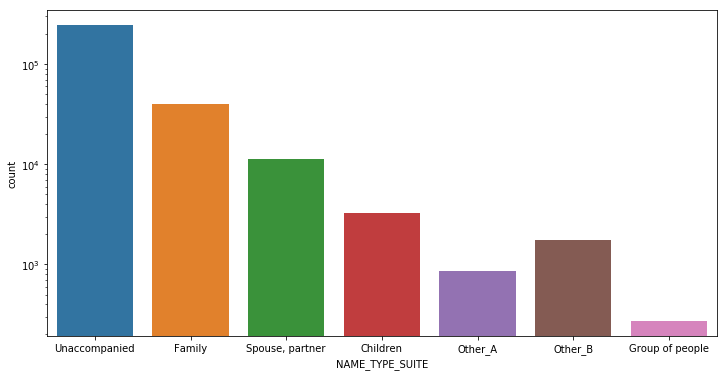

In [97]:
#Check distribution of NAME_TYPE_SUITE
plt.figure(figsize=(12,6))
sns.countplot(x='NAME_TYPE_SUITE', data =appl)
plt.yscale('log')
plt.show()

Most of the people applying for loan are Unaccompained

# Divide the data into two parts 
- For Target 0
- For Target 1

In [42]:
df_0 = appl[appl['TARGET']==0]
df_0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,age_group
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.500,35698.500,1129500.000,Family,State servant,Higher education,Married,House / apartment,0.004,-16765,-1188,-1186.000,-291,nan,1,1,0,1,1,0,Core staff,2.000,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311,0.622,nan,0.096,0.053,0.985,0.796,0.060,0.080,0.035,0.292,0.333,0.013,0.077,0.055,0.004,0.010,0.092,0.054,0.985,0.804,0.050,0.081,0.035,0.292,0.333,0.013,0.079,0.055,0.000,0.000,0.097,0.053,0.985,0.799,0.061,0.080,0.035,0.292,0.333,0.013,0.079,0.056,0.004,0.010,reg oper account,block of flats,0.071,Block,No,1.000,0.000,1.000,0.000,-828.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000,45.932,40-50
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.000,6750.000,135000.000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010,-19046,-225,-4260.000,-2531,26.000,1,1,1,1,1,0,Laborers,1.000,2,2,MONDAY,9,0,0,0,0,0,0,Government,nan,0.556,0.730,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,nan,NaN,NaN,0.000,0.000,0.000,0.000,-815.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000,52.181,50-60
3,100006,0,Cash loans,F,N,Y,0,135000.000,312682.500,29686.500,297000.000,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008,-19005,-3039,-9833.000,-2437,nan,1,1,0,1,0,0,Laborers,2.000,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,nan,0.650,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,nan,NaN,NaN,2.000,0.000,2.000,0.000,-617.000,

In [43]:
df_1 = appl[appl['TARGET']==1]
df_1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,age_group
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.500,24700.500,351000.000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.019,-9461,-637,-3648.000,-2120,nan,1,1,0,1,1,0,Laborers,1.000,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083,0.263,0.139,0.025,0.037,0.972,0.619,0.014,0.000,0.069,0.083,0.125,0.037,0.020,0.019,0.000,0.000,0.025,0.038,0.972,0.634,0.014,0.000,0.069,0.083,0.125,0.038,0.022,0.020,0.000,0.000,0.025,0.037,0.972,0.624,0.014,0.000,0.069,0.083,0.125,0.037,0.021,0.019,0.000,0.000,reg oper account,block of flats,0.015,"Stone, brick",No,2.000,2.000,2.000,2.000,-1134.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,1.000,25.921,20-30
26,100031,1,Cash loans,F,N,Y,0,112500.000,979992.000,27076.500,702000.000,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018,-18724,-2628,-6573.000,-1827,nan,1,1,0,1,0,0,Cooking staff,1.000,3,2,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,nan,0.548,0.191,0.017,0.009,0.973,nan,nan,0.000,0.069,0.042,nan,0.026,nan,0.009,nan,0.000,0.017,0.009,0.973,nan,nan,0.000,0.069,0.042,nan,0.027,nan,0.008,nan,0.000,0.017,0.009,0.973,nan,nan,0.000,0.069,0.042,nan,0.027,nan,0.010,nan,0.000,NaN,block of flats,0.009,Wooden,Yes,10.000,1.000,10.000,0.000,-161.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.000,0.000,0.000,0.000,2.000,2.000,51.299,50-60
40,100047,1,Cash loans,M,N,Y,0,202500.000,1193580.000,35028.000,855000.000,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025,-17482,-1262,-1182.000,-1029,nan,1,1,0,1,0,0,Laborers,2.000,2,2,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,nan,0.307,0.320,0.131,0.125,0.996,0.946,0.082,0.160,0.138,0.250,0.292,0.014,0.106,0.127,0.004,0.008,0.133,0

# Bivariate Analysis

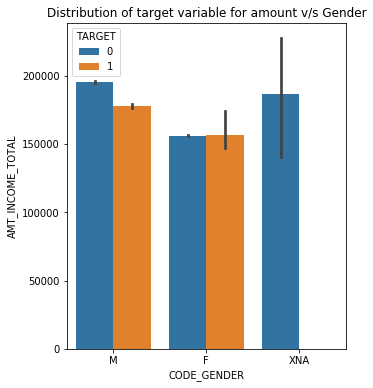

In [161]:
#Check effect of Gender and Income on Target variable based on complete data set
plt.figure(figsize=(5,6))
sns.barplot(x= 'CODE_GENDER', y = 'AMT_INCOME_TOTAL', hue = 'TARGET', data =appl, estimator = np.mean)
#plt.yscale('log')
plt.title('Distribution of target variable for amount v/s Gender')
plt.show()

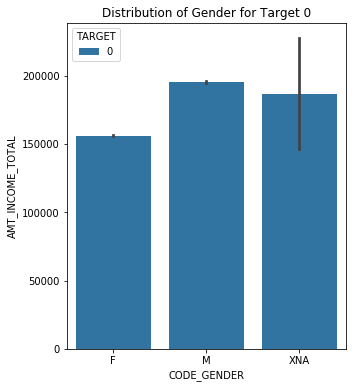

In [59]:
# Check the distribution of Gender and Income on Target Variable coloumn seperately

plt.figure(figsize=(5,6))

sns.barplot(x='CODE_GENDER', y = 'AMT_INCOME_TOTAL', hue = 'TARGET', data =df_0, estimator = np.mean)
plt.title('Distribution of Gender for Target 0')
#plt.yscale('log')
plt.show()

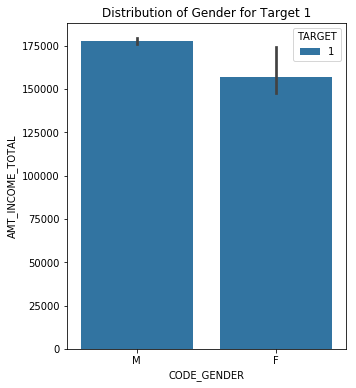

In [162]:
# Check the distribution of Gender and Income on Target Variable  coloumn seperately
plt.figure(figsize=(5,6))
sns.barplot(x='CODE_GENDER', y = 'AMT_INCOME_TOTAL', hue = 'TARGET', data =df_1, estimator = np.mean)
plt.title('Distribution of Gender for Target 1')

#plt.yscale('log')
plt.show()

Text(0.5, 1.0, 'Ratio of defaulters to total number of  application on basis of gender')

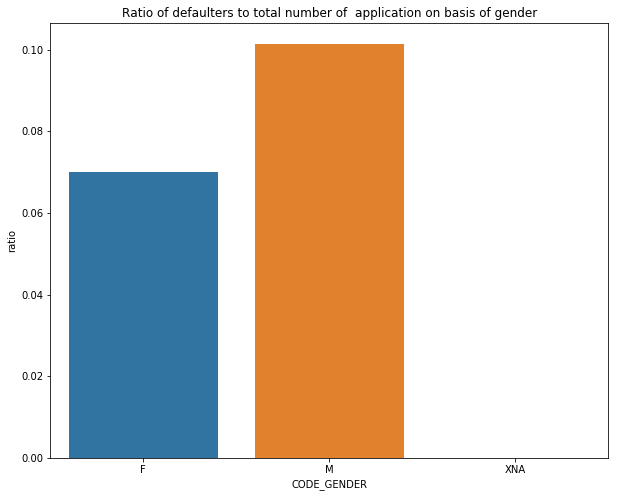

In [142]:
# Getting ratio of defaulters to total applications
gb_0=df_0.groupby(['CODE_GENDER']).agg('count')
gb_0.reset_index(inplace=True)
gb_1=df_1.groupby(['CODE_GENDER']).agg('count')
gb_1.reset_index(inplace=True)


df_ratio=pd.DataFrame({"CODE_GENDER":gb_0['CODE_GENDER'],"ratio":gb_1['SK_ID_CURR']/(gb_0['SK_ID_CURR']+gb_1['SK_ID_CURR'])})
plt.figure(figsize=(10,8))
ax=sns.barplot(x='CODE_GENDER',y='ratio',data=df_ratio)
plt.title('Ratio of defaulters to total number of  application on basis of gender')

### Ratio of men defaulting is much higher than women

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


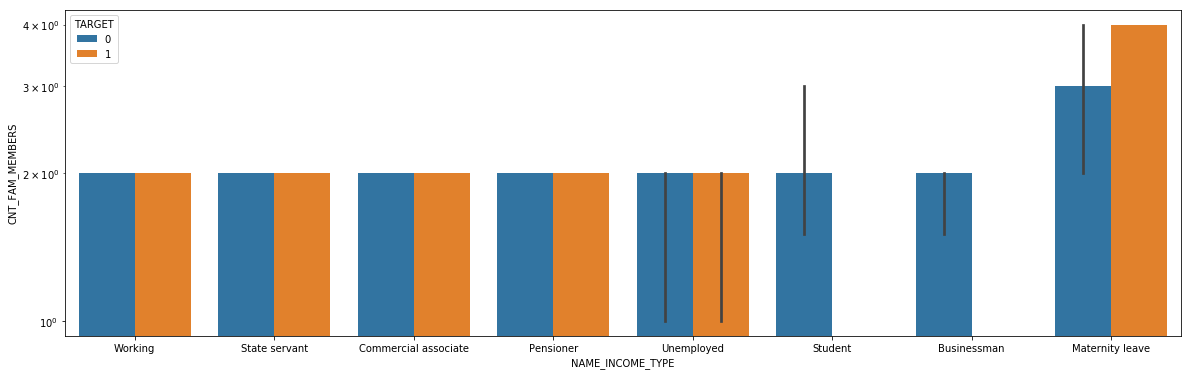

In [124]:
#Check distribution of income type for combined data frame
plt.figure(figsize=(20,6))
sns.barplot(x='NAME_INCOME_TYPE', y = 'CNT_FAM_MEMBERS',hue = 'TARGET', data =appl, estimator = np.median)
plt.yscale('log')
plt.show()

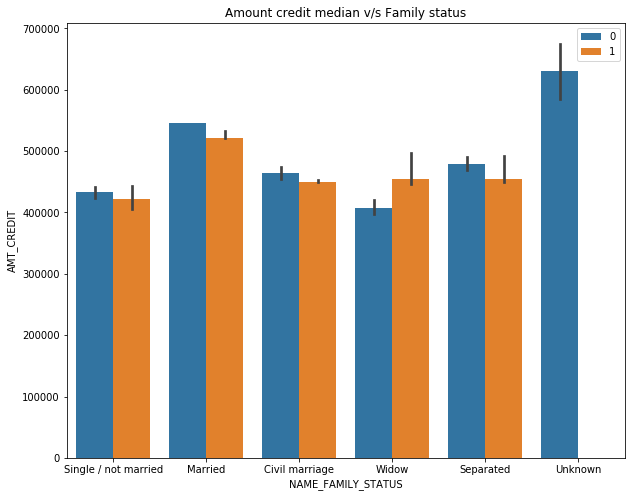

In [163]:
#median credit amount family status wise and comparison on target

plt.figure(figsize=(10,8))
ax=sns.barplot(x='NAME_FAMILY_STATUS',y='AMT_CREDIT' ,hue='TARGET',data=appl,estimator=np.median)
plt.title('Amount credit median v/s Family status')
ax.legend(loc='upper right')

In [118]:
appl[appl['NAME_FAMILY_STATUS']=='Unknown'][['NAME_FAMILY_STATUS','AMT_CREDIT']]

,NAME_FAMILY_STATUS,AMT_CREDIT
41982,Unknown,675000.000
187348,Unknown,585000.000


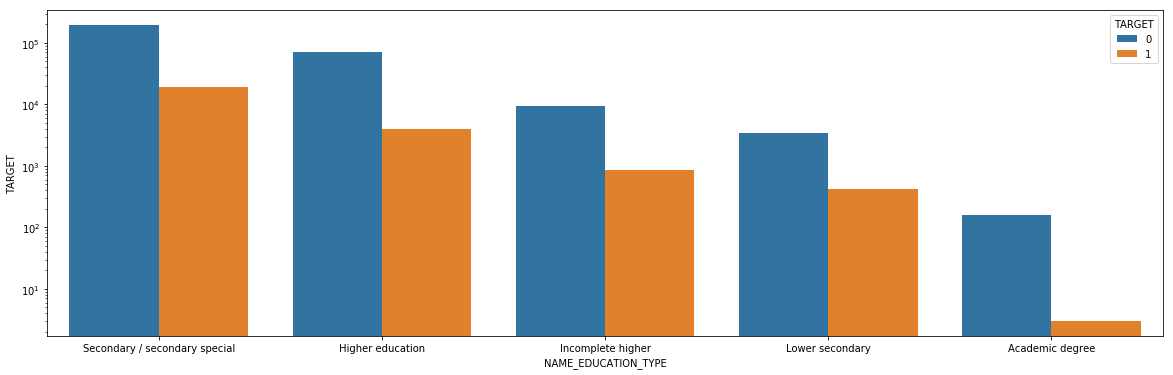

In [138]:
plt.figure(figsize=(20,6))
sns.barplot(x='NAME_EDUCATION_TYPE', y = 'TARGET',hue = 'TARGET', data =appl, estimator = lambda x: len(x))
plt.yscale('log')
plt.show()

Text(0.5, 1.0, 'Ratio of defaulters to total defaulters on basis of education')

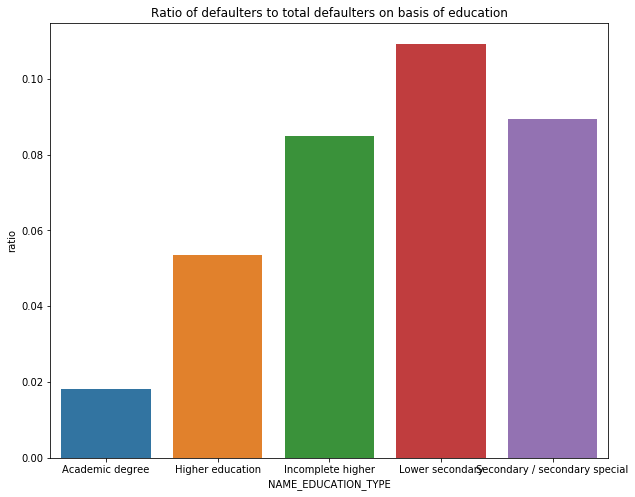

In [164]:
# Getting ration of defaulters to total applications
gb_0=df_0.groupby(['NAME_EDUCATION_TYPE']).agg('count')
gb_0.reset_index(inplace=True)
gb_1=df_1.groupby(['NAME_EDUCATION_TYPE']).agg('count')
gb_1.reset_index(inplace=True)


df_ratio=pd.DataFrame({"NAME_EDUCATION_TYPE":gb_0['NAME_EDUCATION_TYPE'],"ratio":gb_1['SK_ID_CURR']/(gb_0['SK_ID_CURR']+gb_1['SK_ID_CURR'])})
plt.figure(figsize=(10,8))
ax=sns.barplot(x='NAME_EDUCATION_TYPE',y='ratio',data=df_ratio)
plt.title('Ratio of defaulters to total defaulters on basis of education')

### Above graph shows that people with highest education as lower secondary seems to have high defaulter ratio

In [166]:
# Getting ration of defaulters to total applications
gb_0=df_0.groupby(['age_group']).agg('count')
gb_0.reset_index(inplace=True)
gb_1=df_1.groupby(['age_group']).agg('count')
gb_1.reset_index(inplace=True)
df_ratio=pd.DataFrame({"age_group":gb_0['age_group'],"ratio":gb_1['SK_ID_CURR']/(gb_0['SK_ID_CURR']+gb_1['SK_ID_CURR'])})

Text(0.5, 1.0, 'Ratio of age group defaulters')

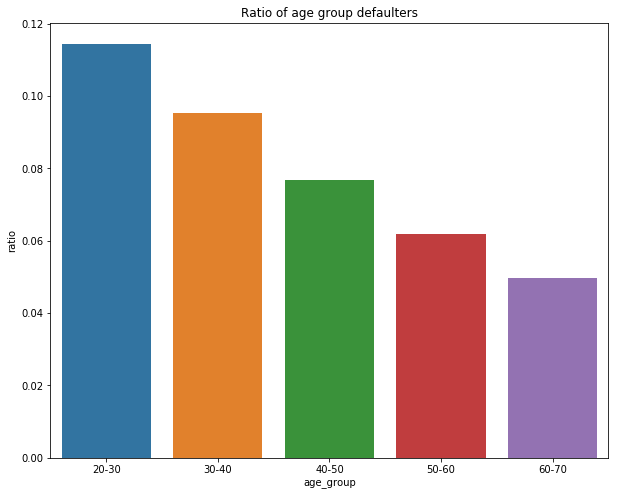

In [167]:
plt.figure(figsize=(10,8))
ax=sns.barplot(x='age_group',y='ratio',data=df_ratio)

plt.title('Ratio of age group defaulters')

### This shows that The age group of 20-30 seems to have maximum percent of defaulters

0     26814
1    181582
2     18150
3     40987
4     15151
Name: SK_ID_CURR, dtype: int64
0     2961
1    14850
2     1620
3     4457
4      937
Name: SK_ID_CURR, dtype: int64


Text(0.5, 1.0, 'Ratio of defaulters to total number of  application on basis of family status')

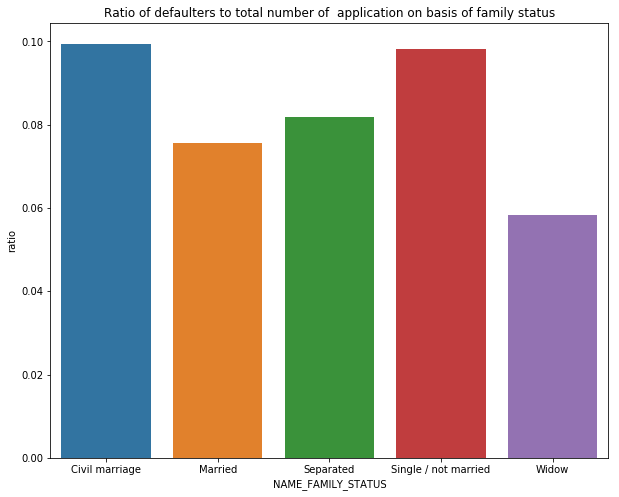

In [155]:
# Getting ratio of defaulters to total applications
gb_0=df_0.groupby(['NAME_FAMILY_STATUS']).agg('count')
gb_0.reset_index(inplace=True)
gb_1=df_1.groupby(['NAME_FAMILY_STATUS']).agg('count')
gb_1.reset_index(inplace=True)


gb_0=gb_0[gb_0['NAME_FAMILY_STATUS']!='Unknown']
gb_0.reset_index(inplace=True)


print(gb_0['SK_ID_CURR'])
print(gb_1['SK_ID_CURR'])
df_ratio=pd.DataFrame({"NAME_FAMILY_STATUS":gb_0['NAME_FAMILY_STATUS'],"ratio":gb_1['SK_ID_CURR']/(gb_0['SK_ID_CURR']+gb_1['SK_ID_CURR'])})
plt.figure(figsize=(10,8))
ax=sns.barplot(x='NAME_FAMILY_STATUS',y='ratio',data=df_ratio)
plt.title('Ratio of defaulters to total number of  application on basis of family status')

### This shows that the family status unknown seems to have a very high defaulter rate. 